29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training model with No Regularization...
Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5577 - loss: 1.2411 - val_accuracy: 0.8100 - val_loss: 0.5341
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8088 - loss: 0.5528 - val_accuracy: 0.8300 - val_loss: 0.4788
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8354 - loss: 0.4589 - val_accuracy: 0.8660 - val_loss: 0.3825
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8596 - loss: 0.4029 - val_accuracy: 0.8630 - val_loss: 0.3845
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8536 - loss: 0.4044 - val_accuracy: 0.8480 - val_loss: 0.4438
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8716 - loss: 0.3727 - val_accuracy: 0.8490 - val_loss: 0.4047
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8755 - loss: 0.3495 - val_accuracy: 0.8750 - val_loss: 0.3407
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9026

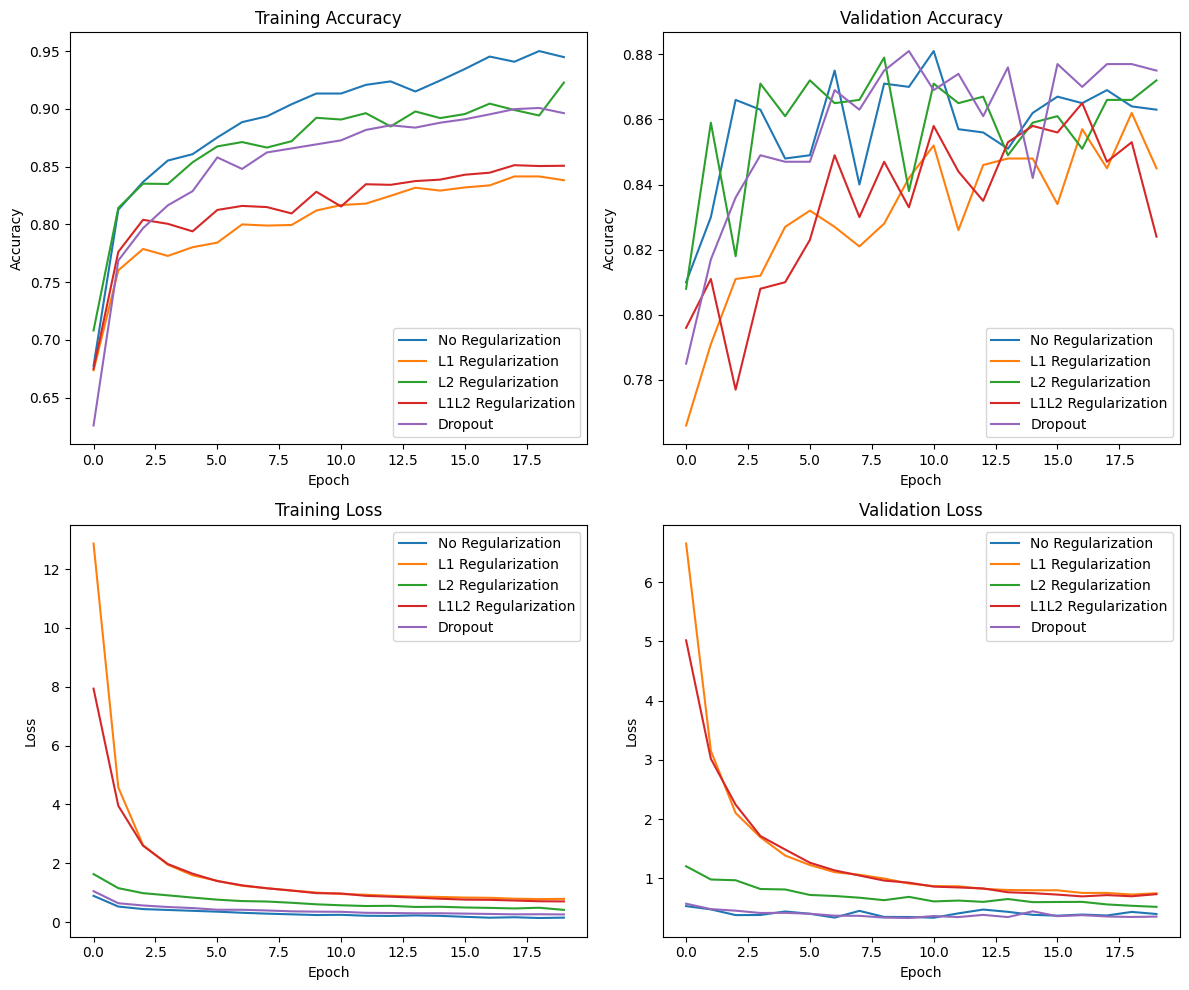


Overfitting Analysis:
----------------------------------------------------------------------
Technique            | Train Acc  | Test Acc   | Gap (Overfit)  
----------------------------------------------------------------------
No Regularization    | 0.9356 | 0.8260 | 0.1096
L1 Regularization    | 0.8358 | 0.7967 | 0.0391
L2 Regularization    | 0.9216 | 0.8346 | 0.0870
L1L2 Regularization  | 0.8382 | 0.7911 | 0.0471
Dropout              | 0.9192 | 0.8343 | 0.0849
----------------------------------------------------------------------


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create a small training subset to induce overfitting
train_size = 5000  # Using a smaller subset to demonstrate overfitting
X_train_small = X_train[:train_size]
y_train_small = y_train[:train_size]

# Training parameters
epochs = 20
batch_size = 64

# Create different models with various regularization techniques
models = {
    'No Regularization': Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ]),

    'L1 Regularization': Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512, activation='relu', kernel_regularizer=l1(0.001)),
        Dense(256, activation='relu', kernel_regularizer=l1(0.001)),
        Dense(10, activation='softmax')
    ]),

    'L2 Regularization': Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        Dense(10, activation='softmax')
    ]),

    'L1L2 Regularization': Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512, activation='relu', kernel_regularizer=l1_l2(l1=0.0005, l2=0.0005)),
        Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=0.0005, l2=0.0005)),
        Dense(10, activation='softmax')
    ]),

    'Dropout': Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512, activation='relu'),
        Dropout(0.3),  # 30% dropout rate
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])
}

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train models with different regularization techniques
history_dict = {}

for name, model in models.items():
    print(f"\nTraining model with {name}...")

    # Compile model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train model
    if name == 'Early Stopping':
        history = model.fit(
            X_train_small, y_train_small,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.2,
            callbacks=[early_stopping],
            verbose=1
        )
    else:
        history = model.fit(
            X_train_small, y_train_small,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.2,
            verbose=1
        )

    # Evaluate model
    train_loss, train_acc = model.evaluate(X_train_small, y_train_small, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    print(f"{name} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"Overfitting Gap: {train_acc - test_acc:.4f}")

    # Store history for plotting
    history_dict[name] = {
        'history': history.history,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'gap': train_acc - test_acc
    }

# Plot validation loss comparison
plt.figure(figsize=(12, 10))

# Plot training accuracy
plt.subplot(2, 2, 1)
for name, data in history_dict.items():
    plt.plot(data['history']['accuracy'], label=f'{name}')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot validation accuracy
plt.subplot(2, 2, 2)
for name, data in history_dict.items():
    plt.plot(data['history']['val_accuracy'], label=f'{name}')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss
plt.subplot(2, 2, 3)
for name, data in history_dict.items():
    plt.plot(data['history']['loss'], label=f'{name}')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot validation loss
plt.subplot(2, 2, 4)
for name, data in history_dict.items():
    plt.plot(data['history']['val_loss'], label=f'{name}')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Compare final results and overfitting metrics
print("\nOverfitting Analysis:")
print("-" * 70)
print(f"{'Technique':<20} | {'Train Acc':<10} | {'Test Acc':<10} | {'Gap (Overfit)':<15}")
print("-" * 70)
for name, data in history_dict.items():
    train_acc = data['train_acc']
    test_acc = data['test_acc']
    gap = data['gap']
    print(f"{name:<20} | {train_acc:.4f} | {test_acc:.4f} | {gap:.4f}")
print("-" * 70)